In [ ]:
import pandas as pd
import numpy as np
from io import StringIO
Train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")

In [ ]:
# fill null values with median for temp_apache
Train['temp_apache'].fillna(Train['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
Train['d1_potassium_max'].fillna(Train['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
Train['apache_4a_hospital_death_prob'].fillna(Train['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
Train['apache_4a_icu_death_prob'].fillna(Train['apache_4a_icu_death_prob'].median(), inplace=True)
#since all these r heavily skewed andaffected by the outliers we will fill them using median imputation

Test['temp_apache'].fillna(Test['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
Test['d1_potassium_max'].fillna(Test['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
Test['apache_4a_hospital_death_prob'].fillna(Test['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
Test['apache_4a_icu_death_prob'].fillna(Test['apache_4a_icu_death_prob'].median(), inplace=True)

# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = Train.groupby('apache_2_bodysystem')['age'].mean()

def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_2_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_2_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
Train['age'] = Train.apply(fill_age, axis=1)

# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = Test.groupby('apache_2_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_2_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_2_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
Test['age'] = Test.apply(fill_age, axis=1)

#for all binary columns we will apply mode imputation for missing values
#first we will create a list of all binary columns
binary_colsTest = ['elective_surgery', 'apache_post_operative', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache','immunosuppression', 'solid_tumor_with_metastasis']

binary_colsTrain = ['elective_surgery', 'apache_post_operative', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache','immunosuppression', 'solid_tumor_with_metastasis','hospital_death']
#now we will apply mode imputation on these columns
from sklearn.impute import SimpleImputer
binary_colsTest = [col for col in Train.columns if Train[col].dtype == 'object' or col in binary_colsTest]
binary_colsTrain = [col for col in Test.columns if Test[col].dtype == 'object' or col in binary_colsTrain]

imputer = SimpleImputer(strategy='most_frequent')
Train[binary_colsTrain] = imputer.fit_transform(Train[binary_colsTrain])
Test[binary_colsTest] = imputer.fit_transform(Test[binary_colsTest])

numeric_cols = [col for col in Train.select_dtypes(include=[np.number]).columns if col not in binary_colsTrain]
numeric_colsTest = [col for col in Test.select_dtypes(include=[np.number]).columns if col not in binary_colsTrain]

from sklearn.impute import KNNImputer

# create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# fill missing values in Train dataframe
Train[numeric_cols] = imputer.fit_transform(Train[numeric_cols])

# fill missing values in Test dataframe
Test[numeric_colsTest] = imputer.fit_transform(Test[numeric_colsTest])
#next we drop simialr record columns
# Train = Train.drop('apache_3j_bodysystem', axis=1)
# Test = Test.drop('apache_3j_bodysystem', axis=1)
# dropcolumns=['d1_diasbp_noninvasive_min','h1_sysbp_max','h1_mbp_max', 'h1_mbp_noninvasive_max', 'h1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_min']
# Train= Train.drop(dropcolumns, axis=1)
# Test= Test.drop(dropcolumns, axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Train = Train.drop('apache_3j_bodysystem', axis=1)
Test = Test.drop('apache_3j_bodysystem', axis=1)
dropcolumns=['d1_diasbp_noninvasive_min','h1_sysbp_max','h1_mbp_max', 'h1_mbp_noninvasive_max', 'h1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_min']
Train= Train.drop(dropcolumns, axis=1)
Test= Test.drop(dropcolumns, axis=1)

In [ ]:
binary = ['elective_surgery', 'apache_post_operative', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache','immunosuppression', 'solid_tumor_with_metastasis']
for cols in binary:
  Train[binary]=Train[binary].astype(int)
  Test[binary]=Test[binary].astype(int)

In [ ]:
onehot=pd.get_dummies(Train)
onehotTest=pd.get_dummies(Test)

In [ ]:
#apply label encoding on all catoegircal columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in Train.columns:
    if Train[col].dtype == 'object':
        Train[col] = le.fit_transform(Train[col])

In [ ]:
Test['ethnicity'] = Test['ethnicity'].replace({
    'Asian': 1,
    'African American': 0,
    'Caucasian': 2,
    'Hispanic': 3,
    'Native American': 4,
    'Other/Unknown': 5
})
Test['gender'] = Test['gender'].replace({
    'M': 1,
    'F': 0
})
Test['icu_admit_source'] = Test['icu_admit_source'].replace({
    'Floor': 1,
    'Accident & Emergency': 0,
    'Operating Room / Recovery': 2,
    'Other Hospital': 3,
    'Other ICU': 4,
})
Test['icu_stay_type'] = Test['icu_stay_type'].replace({
    'admit': 0,
    'transfer': 2,
    'readmit': 1,
})
Test['icu_type'] = Test['icu_type'].replace({
    'Med-Surg ICU': 5,
    'MICU': 4,
    'CSICU': 1,
    'CCU-CTICU': 0,
    'Cardiac ICU': 3,
    'Neuro ICU': 6,
    'CTICU': 2,
    'SICU': 7,
})
Test['apache_2_bodysystem'] = Test['apache_2_bodysystem'].replace({
    'Cardiovascular': 0,
    'Respiratory': 6,
    'Neurologic': 4,
    'Gastrointestinal': 1,
    'Metabolic': 3,
    'Trauma': 7,
    'Undefined diagnoses': 9,
    'Renal/Genitourinary': 5,
    'Haematologic': 2,
    'Undefined Diagnoses': 8,
})

In [ ]:
ohscale = StandardScaler().fit_transform(onehot)
ohscale = pd.DataFrame(ohscale, columns=onehot.columns)
ohscaleTest = StandardScaler().fit_transform(onehotTest)
ohscaleTest = pd.DataFrame(ohscaleTest, columns=onehotTest.columns)


In [ ]:
X2 = StandardScaler().fit_transform(Train)
X2 = pd.DataFrame(X2, columns=Train.columns)


In [ ]:
X2Test = StandardScaler().fit_transform(Test)
X2Test = pd.DataFrame(X2Test, columns=Test.columns)


In [ ]:

import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
%pip install catboost
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
ohscale.shape

(50000, 78)

In [ ]:
pca = PCA(n_components=78)
principalComponents = pca.fit_transform(ohscale)
principaldf = pd.DataFrame(data = principalComponents) #, columns = ['pc1', 'pc2','pc3','pc4'])
pca.explained_variance_ratio_

In [ ]:
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X2)
principaldf = pd.DataFrame(data = principalComponents) #, columns = ['pc1', 'pc2','pc3','pc4'])
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.round(3)

Text(0, 0.5, 'cumulative explained variance')

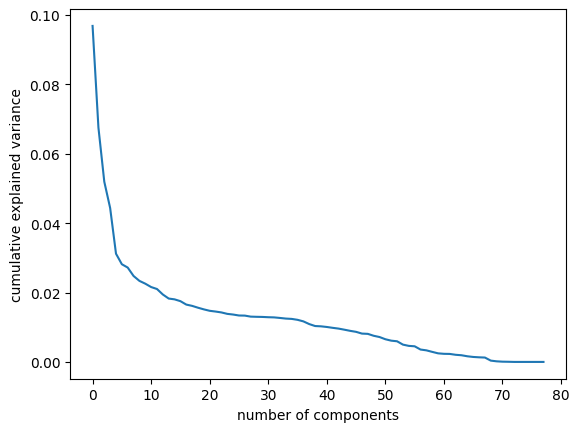

In [ ]:
#plot an elbow graph to find the optimal number of components
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [ ]:
pca = PCA(n_components=70)
principalComponents = pca.fit_transform(ohscale)
principaldf = pd.DataFrame(data = principalComponents)

In [ ]:
principalComponentsTest = pca.fit_transform(ohscaleTest)
principaldfTest = pd.DataFrame(data = principalComponentsTest)

In [ ]:
pca = PCA(n_components=35)
principalComponents = pca.fit_transform(X2)
principaldf = pd.DataFrame(data = principalComponents)

In [ ]:
principalComponentsTest = pca.fit_transform(X2Test)
principaldfTest = pd.DataFrame(data = principalComponentsTest)

In [ ]:
y = Train['hospital_death']
trainX, testX, trainy, testy = train_test_split(principaldf, y, test_size=0.3, random_state=2)

In [ ]:
#record the start time
nb_c = CatBoostClassifier(iterations=650, depth=3, learning_rate=0.1, loss_function='Logloss', verbose=False)
nb_c.fit(trainX,trainy)
md_probs = nb_c.predict_proba(testX)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(testy, md_probs)
print("Cat Boost" , " : ", md_auc)

Cat Boost  :  0.9999975532090261


In [ ]:
#record the start time
nb_c = CatBoostClassifier(iterations=1150, depth=3, learning_rate=0.1, loss_function='Logloss', verbose=False)
nb_c.fit(principaldf,y)
# md_probs = nb_c.predict_proba(testX)
# md_probs = md_probs[:,1]
# md_auc = roc_auc_score(testy, md_probs)
# print("Cat Boost" , " : ", md_auc)

In [ ]:
#split Train into Train and Val
from sklearn.model_selection import train_test_split
X = X2.loc[: , X2.columns != 'hospital_death']
y = Train['hospital_death']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
t1=pd.get_dummies(Train)
t2=pd.get_dummies(Test)

In [ ]:
#split Train into Train and Val
from sklearn.model_selection import train_test_split
X1 = t1.loc[: , t1.columns != 'hospital_death']
y1 = t1['hospital_death']
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
# nb_c = CatBoostClassifier(iterations=850, depth=3, learning_rate=0.1, loss_function='Logloss', verbose=False)
nb_c.fit(principaldf,y)

In [ ]:
y_new_predBAG = nb_c.predict_proba(principaldfTest)
hospital_death = y_new_predBAG[:, 1]
hospital_death



array([1.07323991e-03, 1.47680128e-02, 3.94147441e-04, ...,
       7.77150858e-06, 1.02597517e-05, 3.76160237e-06])

In [ ]:
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
# predictions_df.to_csv('predictionsCAT.csv', index=False)
predictions_df.to_csv('predictionsPCAknn.csv', index=False)

In [ ]:
#record the start time
nb_c = CatBoostClassifier(iterations=660, depth=3, learning_rate=0.1, loss_function='Logloss', verbose=False)
nb_c.fit(X_train1,y_train1)
md_probs = nb_c.predict_proba(X_val1)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_val1, md_probs)
print("Cat Boost" , " : ", md_auc)

Cat Boost  :  0.8772147302449136


In [ ]:
#record the start time
nb_c = CatBoostClassifier(iterations=660, depth=3, learning_rate=0.1, loss_function='Logloss', verbose=False)
nb_c.fit(X_train,y_train)
md_probs = nb_c.predict_proba(X_val)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_val, md_probs)
print("Cat Boost" , " : ", md_auc)

Cat Boost  :  0.8772147302449136


array([0.00879671, 0.05676049, 0.01764323, ..., 0.03060992, 0.06372847,
       0.01547852])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
pipe_kn11 = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=200))])
pipe_kn11.fit(trainX,trainy)
md_probs = pipe_kn11.predict_proba(testX)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(testy, md_probs)
print("Cat Boost" , " : ", md_auc)


Cat Boost  :  0.9965310763222957


In [ ]:
pipe_kn11.fit(principaldf,y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knr', KNeighborsClassifier(n_neighbors=200))])

In [ ]:
y_new_predBAG = pipe_kn11.predict_proba(principaldfTest)
hospital_death = y_new_predBAG[:, 1]
hospital_death



array([0.   , 0.065, 0.015, ..., 0.   , 0.   , 0.   ])